## Ex1: Baseball

In [11]:
#Ap dung Linear Regression de du doan can nang dua tren chieu cao
#Doc du lieu baseball_20.txt
data <- read.csv("Chapter 16- 17\\baseball.csv")
print(head(data))

             Name Team       Position Height Weight   Age PosCategory
1   Adam_Donachie  BAL        Catcher     74    180 22.99     Catcher
2       Paul_Bako  BAL        Catcher     74    215 34.69     Catcher
3 Ramon_Hernandez  BAL        Catcher     72    210 30.78     Catcher
4    Kevin_Millar  BAL  First_Baseman     72    210 35.43   Infielder
5     Chris_Gomez  BAL  First_Baseman     73    188 35.71   Infielder
6   Brian_Roberts  BAL Second_Baseman     69    176 29.39   Infielder


In [12]:
#Xem thong tin summary, so dong, so cot, str
print(paste("No rows of data is ", nrow(data)))
print(paste("No columns of data is ", ncol(data)))
print("Summary is ")
print(summary(data))

[1] "No rows of data is  1015"
[1] "No columns of data is  7"
[1] "Summary is "
              Name           Team                 Position       Height     
 Chris_Young    :   2   NYM    : 38   Relief_Pitcher  :315   Min.   :67.00  
 Tony_Pe?a      :   2   ATL    : 37   Starting_Pitcher:220   1st Qu.:72.00  
 A.J._Burnett   :   1   CHC    : 36   Outfielder      :194   Median :74.00  
 A.J._Murray    :   1   DET    : 36   Catcher         : 76   Mean   :73.69  
 A.J._Pierzynski:   1   OAK    : 36   Second_Baseman  : 58   3rd Qu.:75.00  
 Aaron_Boone    :   1   WAS    : 36   First_Baseman   : 55   Max.   :83.00  
 (Other)        :1007   (Other):796   (Other)         : 97                  
     Weight           Age            PosCategory 
 Min.   :150.0   Min.   :20.90   Catcher   : 76  
 1st Qu.:186.0   1st Qu.:25.41   Infielder :210  
 Median :200.0   Median :27.90   Outfielder:194  
 Mean   :201.3   Mean   :28.71   Pitcher   :535  
 3rd Qu.:215.0   3rd Qu.:31.19                   
 Max

In [13]:
str(data)

'data.frame':	1015 obs. of  7 variables:
 $ Name       : Factor w/ 1013 levels "A.J._Burnett",..: 13 778 801 615 199 134 717 703 66 22 ...
 $ Team       : Factor w/ 30 levels "ANA","ARZ","ATL",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Position   : Factor w/ 8 levels "Catcher","First_Baseman",..: 1 1 1 2 2 5 6 8 8 3 ...
 $ Height     : int  74 74 72 72 73 69 69 71 76 71 ...
 $ Weight     : int  180 215 210 210 188 176 209 200 231 180 ...
 $ Age        : num  23 34.7 30.8 35.4 35.7 ...
 $ PosCategory: Factor w/ 4 levels "Catcher","Infielder",..: 1 1 1 2 2 2 2 2 2 3 ...


In [14]:
baseball <- data[c("Height","Weight")]
head(baseball)

Height,Weight
74,180
74,215
72,210
72,210
73,188
69,176


In [15]:
#Update lai thong tin chieu cao va can nang
baseball["Height"] <- baseball["Height"]*0.0254
baseball["Weight"] <- baseball["Weight"]*0.453592
print("Data after updating is : ")
print(head(baseball))

[1] "Data after updating is : "
  Height   Weight
1 1.8796 81.64656
2 1.8796 97.52228
3 1.8288 95.25432
4 1.8288 95.25432
5 1.8542 85.27530
6 1.7526 79.83219


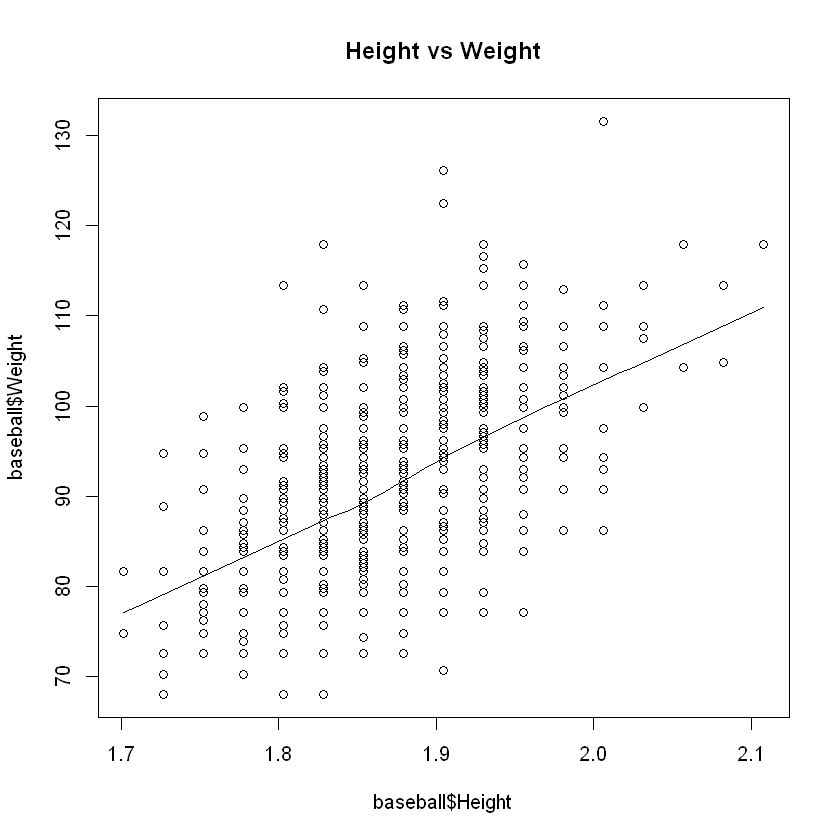

In [16]:
#ve bieu do bieu dien moi quan he input va output(scatter plot)
scatter.smooth(x= baseball$Height, y = baseball$Weight, main = "Height vs Weight")

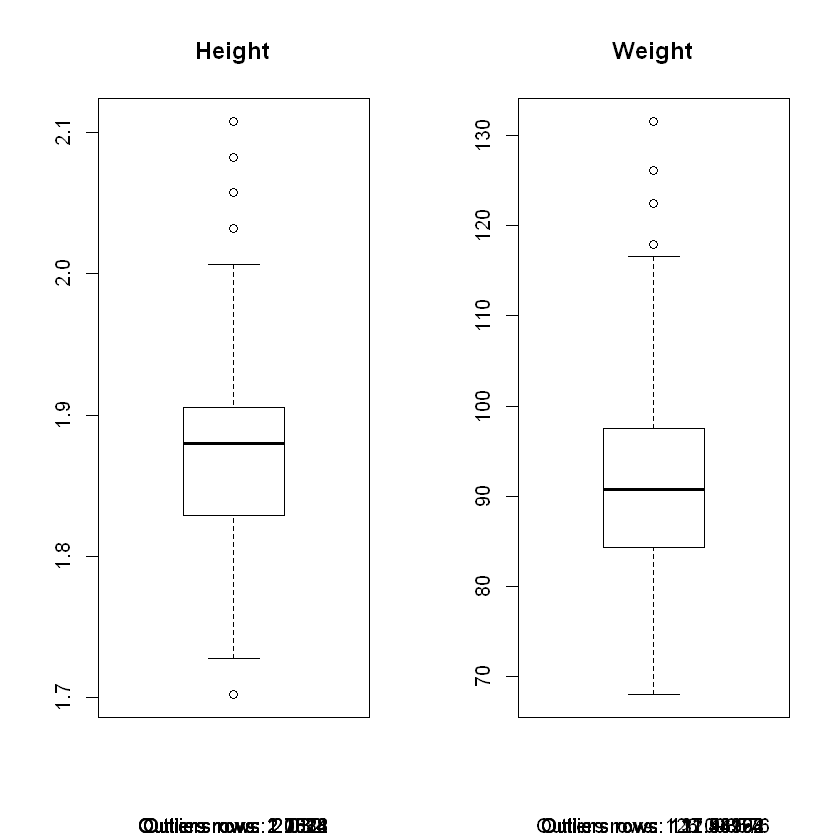

In [17]:
#Kiem tra outliers
par(mfrow = c(1,2) ) #divide graph area in 2 columns
boxplot(baseball$Height, main = "Height",
       sub = paste("Outliers rows:", boxplot.stats(baseball$Height)$out))
boxplot(baseball$Weight, main = "Weight",
       sub = paste("Outliers rows:", boxplot.stats(baseball$Weight)$out))

In [19]:
#Loai bo outliers
ht_outliers <- boxplot.stats(baseball$Height)$out
print("ht_outliers: ")
print(ht_outliers)
print(paste("Numrows: ", sum(baseball$Height == ht_outliers[1])))

[1] "ht_outliers: "
 [1] 2.0574 2.0320 2.0320 2.0320 2.0320 2.0828 2.0320 2.0574 2.0828 2.1082
[11] 1.7018 1.7018
[1] "Numrows:  2"


In [20]:
wt_outliers <- boxplot.stats(baseball$Weight)$out
print("wt_outliers: ")
print(wt_outliers)
print(paste("Numrows: ", sum(baseball$Weight == wt_outliers[1])))

[1] "wt_outliers: "
[1] 117.9339 122.4698 131.5417 126.0986 117.9339 117.9339 117.9339
[1] "Numrows:  4"


In [21]:
#Drop rows have outliers
print(paste("Befor drop:", nrow(baseball)))
for (record in ht_outliers) {
    baseball <- baseball[baseball$Height != record,]
}
for (record in wt_outliers) {
    baseball <- baseball[baseball$Weight != record,]
}
print(paste("After drop:", nrow(baseball)))

[1] "Befor drop: 1015"
[1] "After drop: 998"


In [24]:
#tao train test voi ti le 70 30
set.seed(42) # giu lai bo du lieu lan dau tao khi chay lai nhieu lan
trainingRowindex <- sample(1:nrow(baseball), 0.7*nrow(baseball))#row indicate for train data
print("select train row index")
print(trainingRowindex[1:10]) 
trainingdata <- baseball[trainingRowindex,] #train data
testdata <- baseball[-trainingRowindex,] #train data
print("Rows of train data and test data:")
print(nrow(trainingdata))
print(nrow(testdata))

[1] "select train row index"
 [1] 561 997 321 153  74 228 146 634  49 128
[1] "Rows of train data and test data:"
[1] 698
[1] 300


In [25]:
#build model Linear Regression
lmMod <- lm(Weight ~ Height, data = trainingdata) #build model
weight_pred <- predict(lmMod, testdata) #predict length

In [26]:
mse <- mean(lmMod$residuals^2) #tinh mean square errors to model
print(paste("mes:",mse))

[1] "mes: 62.1665992405898"


In [27]:
#mean square error cua testdata
mse_test = mean((testdata$Weight - weight_pred)^2)
print(paste("mes:",mse_test))

[1] "mes: 57.1830374137474"


In [28]:
print(summary(lmMod))


Call:
lm(formula = Weight ~ Height, data = trainingdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.8230  -5.6531  -0.1704   5.1062  27.6049 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -52.482     10.113   -5.19 2.76e-07 ***
Height        76.675      5.408   14.18  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.896 on 696 degrees of freedom
Multiple R-squared:  0.2241,	Adjusted R-squared:  0.223 
F-statistic:   201 on 1 and 696 DF,  p-value: < 2.2e-16



**Model fits about 22.41% data -> not good**

In [29]:
##model coefficients, Intercept va Variance score
print(coef(lmMod))

(Intercept)      Height 
  -52.48233    76.67488 


In [30]:
slope <- coef(lmMod)['Height']
intercept <- coef(lmMod)['(Intercept)']
print(paste("slope:", slope))
print(paste("intercept:", intercept))

[1] "slope: 76.6748792521459"
[1] "intercept: -52.4823323447599"


In [31]:
#Cho chieu cao lan luot la 
x <- c(1.775, 1.825, 1.925)
y <- intercept + slope*x
print(y)

[1] 83.61558 87.44932 95.11681


In [32]:
#Cach 2:
predict(lmMod, data.frame(Height = x))

1        2        3 
83.61558 87.44932 95.11681

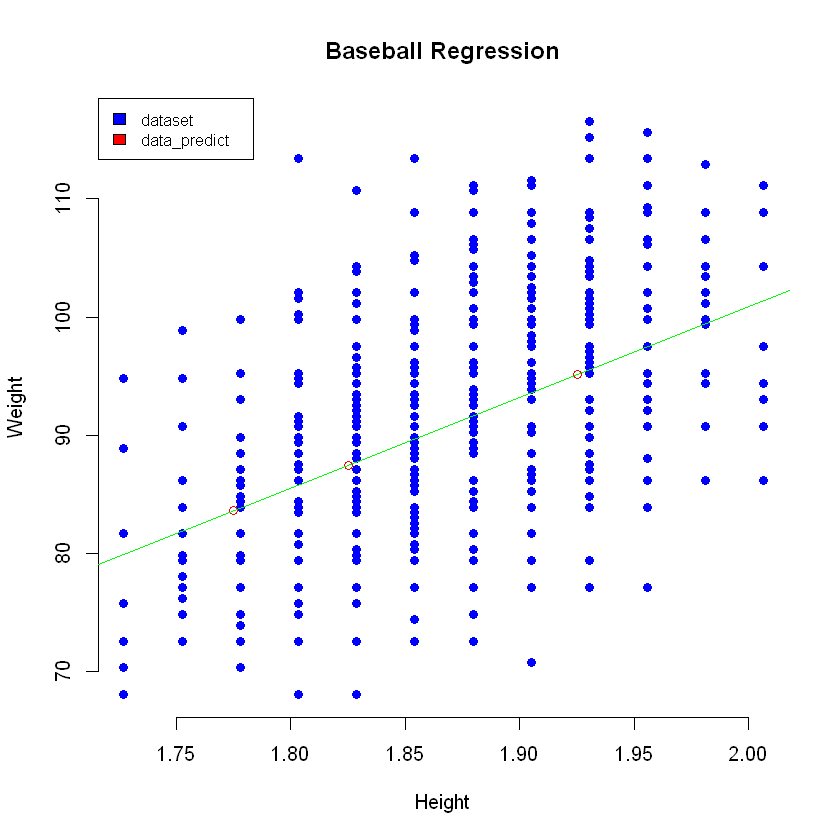

In [36]:
#Ve hinh va xem ket qua
plot(baseball$Height, baseball$Weight, main = "Baseball Regression", xlab = "Height", ylab = "Weight", pch = 19, 
     frame = FALSE, col = "blue")
lines(x,y, col = "red", type = "p")
abline(lmMod, baseball, col = "green")
legend("topleft", c("dataset","data_predict"), cex = 0.8, fill = c("blue", "red"))

## Ex2: Petrol Consumption

#### Yêu cầu 1: Áp dụng Linear regression để dự đoán Petrol Consumption dựa trên Petrol_tax, Population_Driver_licence(%)

In [48]:
#Doc du lieu 
data <- read.csv("Chapter 16- 17\\petrol_consumption.csv")
print(head(data))

  Petrol_tax Average_income Paved_Highways Population_Driver_licence...
1        9.0           3571           1976                        0.525
2        9.0           4092           1250                        0.572
3        9.0           3865           1586                        0.580
4        7.5           4870           2351                        0.529
5        8.0           4399            431                        0.544
6       10.0           5342           1333                        0.571
  Petrol_Consumption
1                541
2                524
3                561
4                414
5                410
6                457


In [49]:
#Xem thong tin summary, so dong, so cot, str
print(paste("No rows of data is ", nrow(data)))
print(paste("No columns of data is ", ncol(data)))
print("Summary is ")
print(summary(data))

[1] "No rows of data is  48"
[1] "No columns of data is  5"
[1] "Summary is "
   Petrol_tax     Average_income Paved_Highways  Population_Driver_licence...
 Min.   : 5.000   Min.   :3063   Min.   :  431   Min.   :0.4510              
 1st Qu.: 7.000   1st Qu.:3739   1st Qu.: 3110   1st Qu.:0.5298              
 Median : 7.500   Median :4298   Median : 4736   Median :0.5645              
 Mean   : 7.668   Mean   :4242   Mean   : 5565   Mean   :0.5703              
 3rd Qu.: 8.125   3rd Qu.:4579   3rd Qu.: 7156   3rd Qu.:0.5952              
 Max.   :10.000   Max.   :5342   Max.   :17782   Max.   :0.7240              
 Petrol_Consumption
 Min.   :344.0     
 1st Qu.:509.5     
 Median :568.5     
 Mean   :576.8     
 3rd Qu.:632.8     
 Max.   :968.0     


In [50]:
str(data)

'data.frame':	48 obs. of  5 variables:
 $ Petrol_tax                  : num  9 9 9 7.5 8 10 8 8 8 7 ...
 $ Average_income              : int  3571 4092 3865 4870 4399 5342 5319 5126 4447 4512 ...
 $ Paved_Highways              : int  1976 1250 1586 2351 431 1333 11868 2138 8577 8507 ...
 $ Population_Driver_licence...: num  0.525 0.572 0.58 0.529 0.544 0.571 0.451 0.553 0.529 0.552 ...
 $ Petrol_Consumption          : int  541 524 561 414 410 457 344 467 464 498 ...


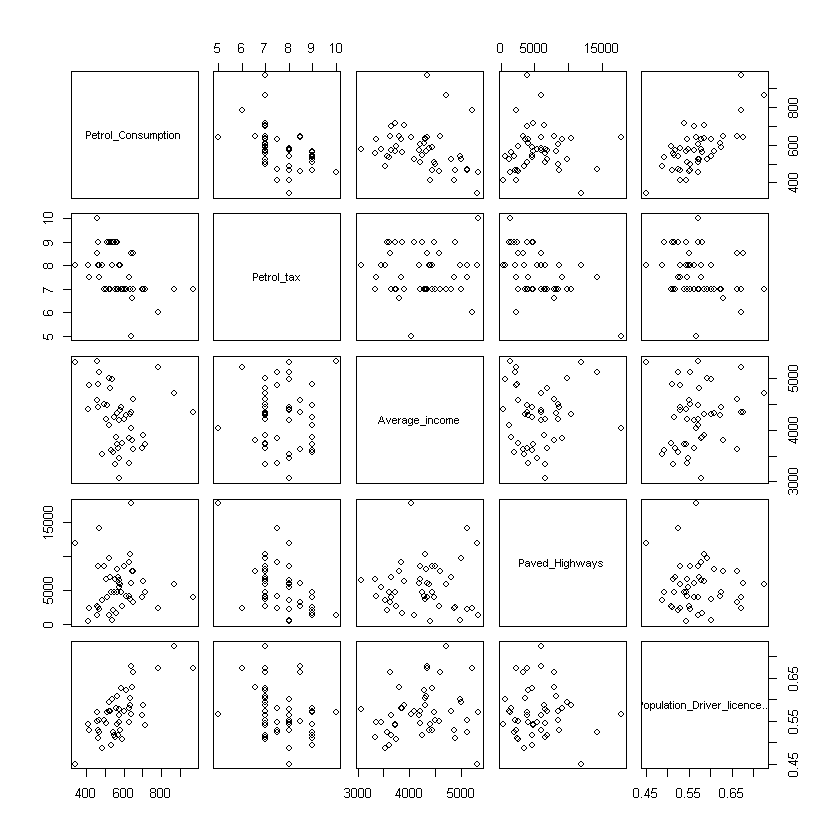

In [51]:
#ve bieu do bieu dien moi quan he cua Petrol_tax vs Petrol_Consumption;Average_income vs Petrol_Consumption; 
#Paved_Highways vs Petrol_Consumption
pairs(~Petrol_Consumption+Petrol_tax+Average_income+Paved_Highways+Population_Driver_licence..., data = data)

In [52]:
input <- data[c("Petrol_tax","Population_Driver_licence...","Petrol_Consumption")]
head(input)

Petrol_tax,Population_Driver_licence...,Petrol_Consumption
9.0,0.525,541
9.0,0.572,524
9.0,0.580,561
7.5,0.529,414
8.0,0.544,410
10.0,0.571,457


In [53]:
#Kiem tra outliers
par(mfrow = c(1,3) ) #divide graph area in 3 columns
boxplot(input$, main = "Petrol_tax",
       sub = paste("Outliers rows:", boxplot.stats(input$Petrol_tax)$out))
boxplot(input$Population_Driver_licence..., main = "Population_Driver_licence...",
       sub = paste("Outliers rows:", boxplot.stats(input$Population_Driver_licence...)$out))
boxplot(input$Petrol_Consumption, main = "Petrol_Consumption",
       sub = paste("Outliers rows:", boxplot.stats(input$Petrol_Consumption)$out))

ERROR: Error in parse(text = x, srcfile = src): <text>:3:15: unexpected ','
2: par(mfrow = c(1,3) ) #divide graph area in 3 columns
3: boxplot(input$,
                 ^


In [54]:
#Loai outliers
Petrol_tax_outliers <- boxplot.stats(input$Petrol_tax)$out
print("Petrol_tax_outliers: ")
print(Petrol_tax_outliers)
print(paste("Numrows: ", sum(input$Petrol_tax == Petrol_tax_outliers[1])))

population_outliers <- boxplot.stats(input$Population_Driver_licence...)$out
print("population_outliers: ")
print(population_outliers)
print(paste("Numrows: ", sum(input$Population_Driver_licence... == population_outliers[1])))

Consumption_outliers <- boxplot.stats(input$Petrol_Consumption)$out
print("Consumption_outliers: ")
print(Consumption_outliers)
print(paste("Numrows: ", sum(input$Petrol_Consumption == Consumption_outliers[1])))

[1] "Petrol_tax_outliers: "
[1] 5
[1] "Numrows:  1"
[1] "population_outliers: "
[1] 0.724
[1] "Numrows:  1"
[1] "Consumption_outliers: "
[1] 865 968
[1] "Numrows:  1"


In [55]:
#Loai outliers
print(paste("Befor drop:", nrow(input)))
for (record in Petrol_tax_outliers) {
    input <- input[input$Petrol_tax != record,]
}
for (record in population_outliers) {
    input <- input[input$Population_Driver_licence... != record,]
}
for (record in Consumption_outliers) {
    input <- input[input$Petrol_Consumption != record,]
}
print(paste("After drop:", nrow(input)))

[1] "Befor drop: 48"
[1] "After drop: 45"


In [56]:
#Tinh correlation
print("correlation Petrol Consumption vs Petrol tax and Population_Driver_licence :")
print(cor(input$Petrol_Consumption, input$Petrol_tax))
print(cor(input$Petrol_Consumption, input$Population_Driver_licence...))

[1] "correlation Petrol Consumption vs Petrol tax and Population_Driver_licence :"
[1] -0.4629515
[1] 0.6052256


In [57]:
#tao train test voi ti le 80 20
set.seed(42) # giu lai bo du lieu lan dau tao khi chay lai nhieu lan
trainingRowindex <- sample(1:nrow(input), 0.8*nrow(input))#row indicate for train data
print("select train row index")
print(trainingRowindex[1:10]) 
trainingdata <- input[trainingRowindex,] #train data
testdata <- input[-trainingRowindex,] #train data
print("Rows of train data and test data:")
print(nrow(trainingdata))
print(nrow(testdata))

[1] "select train row index"
 [1] 37  1 25 10 36 18 24  7 41 43
[1] "Rows of train data and test data:"
[1] 36
[1] 9


In [60]:
#build model Linear Regression
lmMod <- lm(Petrol_Consumption ~ Petrol_tax+Population_Driver_licence..., data = trainingdata) #build model
y_pred <- predict(lmMod, testdata) #predict length

In [61]:
mse <- mean(lmMod$residuals^2) #tinh mean square errors to model
print(paste("mes:",mse))

[1] "mes: 4739.38834330755"


In [62]:
#mean square error cua testdata
mse_test = mean((testdata$Petrol_Consumption - y_pred)^2)
print(paste("mes in testdata:",mse_test))

[1] "mes in testdata: 1247.25293774595"


In [63]:
print(summary(lmMod))


Call:
lm(formula = Petrol_Consumption ~ Petrol_tax + Population_Driver_licence..., 
    data = trainingdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.16  -61.70    7.70   58.74  151.40 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)   
(Intercept)                    256.26     221.90   1.155  0.25647   
Petrol_tax                     -31.34      14.47  -2.166  0.03762 * 
Population_Driver_licence...   973.59     270.33   3.602  0.00103 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 71.9 on 33 degrees of freedom
Multiple R-squared:  0.457,	Adjusted R-squared:  0.4241 
F-statistic: 13.89 on 2 and 33 DF,  p-value: 4.205e-05



**Model has R-square slow and fits ~ 45.7% data -> not good**

In [64]:
##model coefficients, Intercept va Variance score
print(coef(lmMod))

                 (Intercept)                   Petrol_tax 
                   256.25506                    -31.34155 
Population_Driver_licence... 
                   973.59063 


In [66]:
intercept <- coef(lmMod)['(Intercept)']
m1 <- coef(lmMod)['Petrol_tax']
m2 <- coef(lmMod)['Population_Driver_licence...']
print(paste("intercept:", intercept))
print(paste("Petrol tax:", m1))
print(paste("Population_Driver_licence:", m2))

[1] "intercept: 256.255062418025"
[1] "Petrol tax: -31.3415479167604"
[1] "Population_Driver_licence: 973.590630793001"


In [67]:
#predict
#Cach 1
x1 <- 9
x2 <- 0.58
y <- (m1*x1 + m2*x2 + intercept)
print(y)

Petrol_tax 
  538.8637 


In [69]:
#predict
#Cach 2
y1 <- predict(lmMod, data.frame(Petrol_tax = x1, Population_Driver_licence... = x2 ))
print(paste("y =",y1))

[1] "y = 538.863697027122"


### Yêu cầu 2: Áp dụng BMA để lựa chọn model với các thuộc tính phù hợp cho việc dùng Linear Regression dự đoán Petrol_Consumption

In [70]:
library(BMA)

Warning message:
"package 'BMA' was built under R version 3.6.2"Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: leaps
Warning message:
"package 'leaps' was built under R version 3.6.2"Loading required package: robustbase
Warning message:
"package 'robustbase' was built under R version 3.6.2"
Attaching package: 'robustbase'

The following object is masked from 'package:survival':

    heart

Loading required package: inline
Loading required package: rrcov
Warning message:
"package 'rrcov' was built under R version 3.6.2"Scalable Robust Estimators with High Breakdown Point (version 1.5-2)



In [71]:
#get input data
yvar <- data[,('Petrol_Consumption')]
xvar <- data[,c(-5)]
bma = bicreg(xvar, yvar, strict = F, OR = 2)#Khong co moi tuong quan de strict = F, OR = 2

In [72]:
print(summary(bma))


Call:
bicreg(x = xvar, y = yvar, strict = F, OR = 2)


  1  models were selected
 Best  1  models (cumulative posterior probability =  1 ): 

                              p!=0   EV         SD         model 1   
Intercept                     100    307.32790  156.83067   307.32790
Petrol_tax                    100    -29.48381   10.58358   -29.48381
Average_income                100     -0.06802    0.01701    -0.06802
Paved_Highways                  0      0.00000    0.00000       .    
Population_Driver_licence...  100   1374.76841  183.66954  1374.76841
                                                                     
nVar                                                            3    
r2                                                            0.675  
BIC                                                         -42.31437
post prob                                                     1      
                             p!=0   EV          SD          model 1     
Intercept     

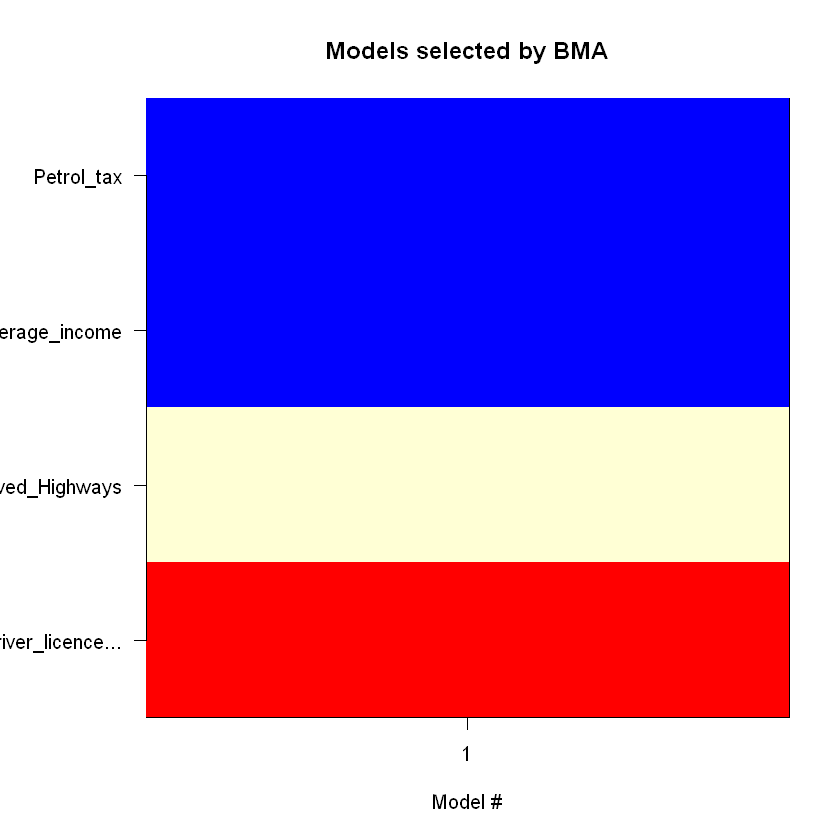

In [73]:
#visualize
imageplot.bma(bma)

**BMA đưa ra chỉ có một model tốt nhất với 3 variables :Petrol_tax, Average_income, Population_Driver_licence...**